In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
ourGenre = 'Adventure'

In [3]:
data = pd.read_csv(f"../GenresCSV/{ourGenre}.csv")
data

,Unnamed: 0,imdbID,Genre
0,0,tt0080684,1
1,1,tt0080377,0
2,2,tt0080377,0
3,3,tt0080549,0
4,4,tt0080549,0
...,...,...,...
2029,2029,tt3534282,1
2030,2030,tt4425148,1
2031,2031,tt2904688,1
2032,2032,tt3896100,1


In [4]:
genre = []
poster = []

In [5]:
for i in range(len(data)):
    tempImage = Image.open(f"../Posters100x100/{data['imdbID'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])

In [6]:
print(len(genre))
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

2034
2034
100
100
3


In [7]:
GenreStrings = [f"Not {ourGenre}", f"{ourGenre}"]

In [8]:
for i in range(len(poster) -1, -1 ,-1):
    if poster[i].shape != (100,100,3): 
        #some posters didnt have 100,100,3 so we deleted them
        genre.pop(i)
        poster.pop(i)
        
print(len(genre))

2034


In [9]:
X_train, X_test, y_train, y_test = train_test_split(poster, genre, test_size=0.1)

In [10]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1830
1830
204
204


In [11]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (1830, 100, 100, 3)
1830 train samples
204 test samples


In [13]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print (y_train.shape)
print(y_test.shape)
print (y_train)
print (y_train[0])

(1830, 2)
(204, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[0. 1.]


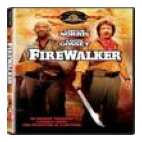

[0. 1.]
Adventure


In [14]:
index = 50
plt.figure(figsize=(20, 4))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(X_train[index].reshape(100, 100,3))
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()
print(y_train[index])
print(GenreStrings[np.argmax(y_train[index])])

In [15]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(len(GenreStrings), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dropout (Dropout)           (None, 20000)             0

In [16]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])

In [17]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
12/12 [==============================] - 9s 748ms/step - loss: 0.7555 - accuracy: 0.5075 - val_loss: 0.6908 - val_accuracy: 0.5082
Epoch 2/5
12/12 [==============================] - 9s 745ms/step - loss: 0.6851 - accuracy: 0.5499 - val_loss: 0.6863 - val_accuracy: 0.4672
Epoch 3/5
12/12 [==============================] - 10s 827ms/step - loss: 0.6588 - accuracy: 0.5908 - val_loss: 0.6433 - val_accuracy: 0.6530
Epoch 4/5
12/12 [==============================] - 9s 766ms/step - loss: 0.6138 - accuracy: 0.6831 - val_loss: 0.5968 - val_accuracy: 0.6995
Epoch 5/5
12/12 [==============================] - 9s 744ms/step - loss: 0.5676 - accuracy: 0.7302 - val_loss: 0.5892 - val_accuracy: 0.6749


In [18]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
12/12 [==============================] - 9s 739ms/step - loss: 0.5306 - accuracy: 0.7357 - val_loss: 0.5255 - val_accuracy: 0.7541
Epoch 2/5
12/12 [==============================] - 9s 767ms/step - loss: 0.4714 - accuracy: 0.7937 - val_loss: 0.5215 - val_accuracy: 0.7240
Epoch 3/5
12/12 [==============================] - 9s 747ms/step - loss: 0.4203 - accuracy: 0.8279 - val_loss: 0.5412 - val_accuracy: 0.7350
Epoch 4/5
12/12 [==============================] - 9s 750ms/step - loss: 0.3834 - accuracy: 0.8504 - val_loss: 0.5170 - val_accuracy: 0.7432
Epoch 5/5
12/12 [==============================] - 9s 749ms/step - loss: 0.3642 - accuracy: 0.8531 - val_loss: 0.5195 - val_accuracy: 0.7623


(204, 2)


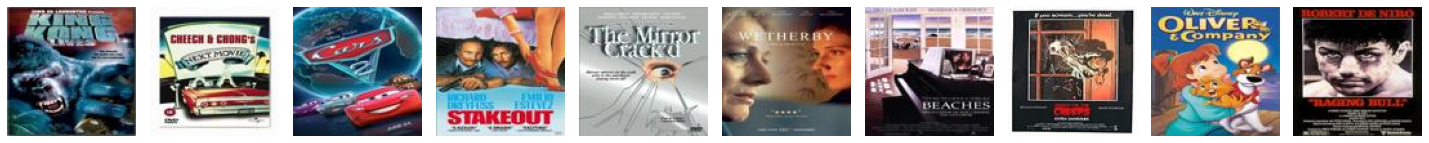

[0.62839735 0.37160268]
0
Genre is Adventure Predicted is Not Adventure ([0.62839735 0.37160268])
Genre is Not Adventure Predicted is Not Adventure ([0.9426828  0.05731722])
Genre is Adventure Predicted is Adventure ([0.14390649 0.8560935 ])
Genre is Not Adventure Predicted is Not Adventure ([0.6725768  0.32742324])
Genre is Not Adventure Predicted is Not Adventure ([0.7945202  0.20547979])
Genre is Not Adventure Predicted is Not Adventure ([0.6393955  0.36060447])
Genre is Not Adventure Predicted is Adventure ([0.40438265 0.59561735])
Genre is Not Adventure Predicted is Not Adventure ([0.98840374 0.0115963 ])
Genre is Adventure Predicted is Not Adventure ([0.6291277  0.37087232])
Genre is Not Adventure Predicted is Not Adventure ([0.71988946 0.28011048])


In [19]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
offset = 0
decoded_imgs1= decoded_imgs1[offset:]
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i+offset].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  print(f"Genre is {GenreStrings[np.argmax(y_test[i+offset])]} Predicted is {GenreStrings[np.argmax(decoded_imgs1[i])]} ({decoded_imgs1[i+offset]})")

In [20]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

7/7 [==============================] - 0s 36ms/step - loss: 0.4677 - accuracy: 0.7647
Test Loss: 46.77%
Test Accuracy:  76.47%


In [21]:
checkpoint_path = f"../Weights/{GenreStrings[1]}/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [22]:
model.save_weights(checkpoint_path)

In [23]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'../Weights/Adventure\\cp.ckpt'

In [24]:
# Loads the weights
model.load_weights(checkpoint_path)

In [25]:
# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7/7 - 0s - loss: 0.4677 - accuracy: 0.7647 - 272ms/epoch - 39ms/step
Restored model, accuracy: 76.47%
